#Self

Name - Soumya Bairagya

College - VIT, Pune

E-mail - bairagyasoumya2001@gmail.com

Ph no - 9860135277

#**Assignment 4**
## *HR Analysis*

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading and printing the csv file
df = pd.read_csv("HR_comma_sep.csv")
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
#To know the no. of rows and columns in the dataset
df.shape

(14999, 10)

So, the dataset has 14999 rows and 10 columns

In [ ]:
left = df[df.left==1]
left.shape

(3571, 10)

In [ ]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [ ]:
#To know the datatypes of the elements present in the dataset
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

So there are 2 columns which have their data type as object/string while rest are numerical

In [ ]:
#To check if there are any null values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Looks like about 76% of employees stayed and 24% of employees left. 
left_rate = df.left.value_counts() / len(df)
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

**Part 1** - Exploratory data analysis to figure out which variables have direct and clear impact on employee retention

In [ ]:
# Overview of summary (Turnover V.S. Non-turnover)
left_Summary = df.groupby('left')
left_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Conclusion - 

        "satisfaction_level" - It is low for those who have left the company i.e 0.44 as compared to the ones retained i.e 0.66
        "average_montly_hours" - Average monthly hours of the ones who have left the comapany(207.42) is greater than the ones who retained(199.06)
        "promotion_last_5years" - Promotion of the people who have left(0.005321) the company is less than the ones who retained(0.026251) 

###Bar Graphs

Now, the string columns, i.e Department and Salary may have an impact on employee retention. So for checking them - 

####Bar chart showing impact of employee salaries on retention

Below is the bar graph showing impact of employee salaries on retention

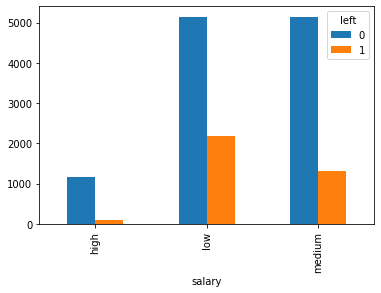

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

**Conclusion** - 

        From above graph, we can conclude that salary also has an impact on employee retention. 
        We can notice the difference of the ones who left and retained in the company from above graph.
        Employees with higher salaries are likely to retain.  

####Bar chart showing correlation between department and employee retention

Below is the bar chart showing correlation between department and employee retention

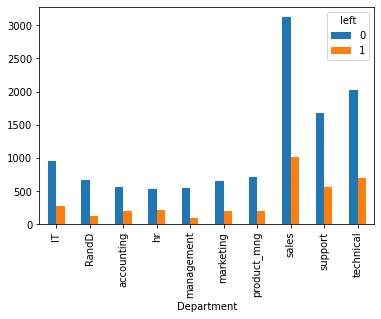

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**Conclusion** - 

        Department does not have major impact on employee retention.

##Major impacting variables

***So from the exploratory data analysis, variables which have direct and clear impact on employee retention are*** -

        1. satisfaction_level
        2. average_montly_hours
        3. promotion_last_5years
        4. salary

##**Building the Logistic Regression Model**

In [ ]:
#So the new dataframe is
newdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
newdf.head(7)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
5,0.41,153,0,low,1
6,0.10,247,0,low,1


In [ ]:
#Salary has all string data, so we use the dummies variables concept
saldummies = pd.get_dummies(newdf.salary,prefix='salary')
saldummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
new2df = pd.concat([newdf,saldummies],axis=1)
new2df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


In [ ]:
final = new2df.drop(['salary'],axis=1)
final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


In [ ]:
X=final.drop(['left'],axis=1)
X.head(7)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
5,0.41,153,0,0,1,0
6,0.10,247,0,0,1,0


In [ ]:
Y=df["left"]
Y.head(7)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
X_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
2667,0.53,151,0,0,1,0
6131,0.52,269,0,0,0,1
12000,0.38,157,0,0,1,0
3289,0.96,170,0,1,0,0
6749,0.96,186,0,0,0,1


In [ ]:
Y_train.head()

2667     0
6131     0
12000    1
3289     0
6749     0
Name: left, dtype: int64

In [ ]:
len(X_train)

10499

In [ ]:
len(X_test)

4500

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y_predict = model.predict(X_test)
Y_predict

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
Y_test.head()

2881     0
9901     0
10576    0
10706    0
13851    0
Name: left, dtype: int64

***The Accuracy of Model***

In [ ]:
#Checking accuracy
model.score(X_test,Y_test)

0.7802222222222223

This is the accuracy achieved by model

##Summary

In [ ]:
import seaborn as sns

[Text(0, 0.5, 'Percent')]

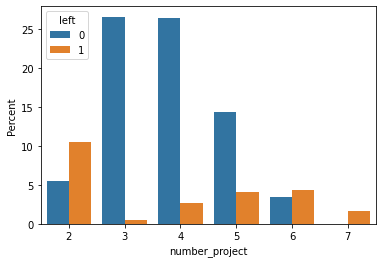

In [ ]:
ax = sns.barplot(x="number_project", y="number_project", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary of above graph:

1. More than half of the employees with 2,6, and 7 projects left the company
2. Majority of the employees who did not leave the company had 3,4, and 5 projects
3. All of the employees with 7 projects left the company
4. There is an increase in employee turnover rate as project count increases

[Text(0, 0.5, 'Percent')]

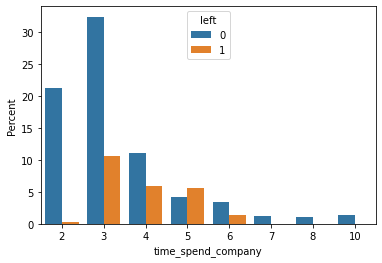

In [ ]:
ax = sns.barplot(x="time_spend_company", y="time_spend_company", hue="left", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary: Let's see if theres a point where employees start leaving the company

1. More than half of the employees with 4 and 5 years left the company

2. Employees with 5 years should highly be looked into

###Accuracy of Model

In [ ]:
#Accuravy of the model by using columns which have direct and clear impact on employee retention
model.score(X_test,Y_test)

0.7802222222222223

Hence, the accuracy achieved is 0.7802222222222223

###Conclusion
Hence,

      1. By doing exploratory data analysis to figure out which variables have direct and clear impact on employee retention, 
      the most important impacting variables are 
                a. satisfaction_level
                b. average_montly_hours
                c. promotion_last_5years
                d. salary
      2. Bar plot charts have been plotted
      3. Building Logistic Regression model is done.
      4. Accuracy achieved by using important variables is 0.7802222222222223